In [2]:
import numpy as np
import pandas as pd
import sys
import os
import importlib

sys.path.append(os.path.abspath("../base"))
import classify
import features
pd.set_option("display.max_columns", None)

In [39]:
importlib.reload(classify)  # Reload the classify module
importlib.reload(features)

<module 'features' from '/Users/kevinwong/Library/CloudStorage/GoogleDrive-kew024@ucsd.edu/My Drive/UCSD Winter Quarter 2025/dsc180b/dsc180b-capstone-q2/src/base/features.py'>

In [4]:
categories, consumer, acct, transactions = features.get_datasets()
transaction_categories = features.get_transaction_categories(transactions, categories)
all_features = features.one_hot_accounts(acct, consumer)
all_features = features.get_categorical_features2(
    all_features, transaction_categories, acct
)

In [4]:
all_features.head()

,prism_consumer_id,evaluation_date,credit_score,DQ_TARGET,account_type_401K,account_type_AUTO,account_type_BROKERAGE,account_type_CASH MANAGEMENT,account_type_CD,account_type_CHECKING,account_type_CONSUMER,account_type_CREDIT CARD,account_type_HOME EQUITY,account_type_HSA,account_type_IRA,account_type_LINE OF CREDIT,account_type_LOAN,account_type_MONEY MARKET,account_type_MONEYMARKET,account_type_MORTGAGE,account_type_OTHER,account_type_OVERDRAFT,account_type_PREPAID,account_type_RETIREMENT,account_type_ROTH,account_type_SAVINGS,account_type_STOCK PLAN,account_type_STUDENT,ACCOUNT_FEES_coef_variation,ATM_CASH_coef_variation,AUTOMOTIVE_coef_variation,AUTO_LOAN_coef_variation,BANKING_CATCH_ALL_coef_variation,BILLS_UTILITIES_coef_variation,BNPL_coef_variation,CHILD_DEPENDENTS_coef_variation,CORPORATE_PAYMENTS_coef_variation,CREDIT_CARD_PAYMENT_coef_variation,DEBT_coef_variation,DEPOSIT_coef_variation,EDUCATION_coef_variation,ENTERTAINMENT_coef_variation,ESSENTIAL_SERVICES_coef_variation,EXTERNAL_TRANSFER_coef_variation,FITNESS_coef_variation,FOOD_AND_BEVERAGES_coef_variation,GAMBLING_coef_variation,GENERAL_MERCHANDISE_coef_variation,GIFTS_DONATIONS_coef_variation,GOVERNMENT_SERVICES_coef_variation,GROCERIES_coef_variation,HEALTHCARE_MEDICAL_coef_variation,HOME_IMPROVEMENT_coef_variation,INSURANCE_coef_variation,INVESTMENT_coef_variation,INVESTMENT_INCOME_coef_variation,LEGAL_coef_variation,LOAN_coef_variation,MISCELLANEOUS_coef_variation,MORTGAGE_coef_variation,OTHER_BENEFITS_coef_variation,OVERDRAFT_coef_variation,PAYCHECK_coef_variation,PENSION_coef_variation,PETS_coef_variation,REFUND_coef_variation,RENT_coef_variation,RISK_CATCH_ALL_coef_variation,RTO_LTO_coef_variation,SELF_TRANSFER_coef_variation,TAX_coef_variation,TIME_OR_STUFF_coef_variation,TRANSPORATION_coef_variation,TRAVEL_coef_variation,UNEMPLOYMENT_BENEFITS_coef_variation,ACCOUNT_FEES_count,ATM_CASH_count,AUTOMOTIVE_count,AUTO_LOAN_count,BANKING_CATCH_ALL_count,BILLS_UTILITIES_count,BNPL_count,CHILD_DEPENDENTS_count,CORPORATE_PAYMENTS_count,CREDIT_CARD_PAYMENT_count,DEBT_count,DEPOSIT_count,EDUCATION_count,ENTERTAINMENT_count,ESSENTIAL_SERVICES_count,EXTERNAL_TRANSFER_count,FITNESS_count,FOOD_AND_BEVERAGES_count,GAMBLING_count,GENERAL_MERCHANDISE_count,GIFTS_DONATIONS_count,GOVERNMENT_SERVICES_count,GROCERIES_count,HEALTHCARE_MEDICAL_count,HOME_IMPROVEMENT_count,INSURANCE_count,INVESTMENT_count,INVESTMENT_INCOME_count,LEGAL_count,LOAN_count,MISCELLANEOUS_count,MORTGAGE_count,OTHER_BENEFITS_count,OVERDRAFT_count,PAYCHECK_count,PENSION_count,PETS_count,REFUND_count,RENT_count,RISK_CATCH_ALL_count,RTO_LTO_count,SELF_TRANSFER_count,TAX_count,TIME_OR_STUFF_count,TRANSPORATION_count,TRAVEL_count,UNEMPLOYMENT_BENEFITS_count,ACCOUNT_FEES_iqr,ATM_CASH_iqr,AUTOMOTIVE_iqr,AUTO_LOAN_iqr,BANKING_CATCH_ALL_iqr,BILLS_UTILITIES_iqr,BNPL_iqr,CHILD_DEPENDENTS_iqr,CORPORATE_PAYMENTS_iqr,CREDIT_CARD_PAYMENT_iqr,DEBT_iqr,DEPOSIT_iqr,EDUCATION_iqr,ENTERTAINMENT_iqr,ESSENTIAL_SERVICES_iqr,EXTERNAL_TRANSFER_iqr,FITNESS_iqr,FOOD_AND_BEVERAGES_iqr,GAMBLING_iqr,GENERAL_MERCHANDISE_iqr,GIFTS_DONATIONS_iqr,GOVERNMENT_SERVICES_iqr,GROCERIES_iqr,HEALTHCARE_MEDICAL_iqr,HOME_IMPROVEMENT_iqr,INSURANCE_iqr,INVESTMENT_iqr,INVESTMENT_INCOME_iqr,LEGAL_iqr,LOAN_iqr,MISCELLANEOUS_iqr,MORTGAGE_iqr,OTHER_BENEFITS_iqr,OVERDRAFT_iqr,PAYCHECK_iqr,PENSION_iqr,PETS_iqr,REFUND_iqr,RENT_iqr,RISK_CATCH_ALL_iqr,RTO_LTO_iqr,SELF_TRANSFER_iqr,TAX_iqr,TIME_OR_STUFF_iqr,TRANSPORATION_iqr,TRAVEL_iqr,UNEMPLOYMENT_BENEFITS_iqr,ACCOUNT_FEES_median,ATM_CASH_median,AUTOMOTIVE_median,AUTO_LOAN_median,BANKING_CATCH_ALL_median,BILLS_UTILITIES_median,BNPL_median,CHILD_DEPENDENTS_median,CORPORATE_PAYMENTS_median,CREDIT_CARD_PAYMENT_median,DEBT_median,DEPOSIT_median,EDUCATION_median,ENTERTAINMENT_median,ESSENTIAL_SERVICES_median,EXTERNAL_TRANSFER_median,FITNESS_median,FOOD_AND_BEVERAGES_median,GAMBLING_median,GENERAL_MERCHANDISE_median,GIFTS_DONATIONS_median,GOVERNMENT_SERVICES_median,GROCERIES_median,HEALTHCARE_MEDICAL_median,HOME


Logistic Regression Results
ROC-AUC: 0.761 | Accuracy: 0.759
Training Time: 1.6s
              precision    recall  f1-score   support

         0.0       0.96      0.77      0.86      2416
         1.0       0.17      0.62      0.27       186

    accuracy                           0.76      2602
   macro avg       0.57      0.69      0.56      2602
weighted avg       0.91      0.76      0.81      2602


Random Forest Results
ROC-AUC: 0.794 | Accuracy: 0.915
Training Time: 24.1s
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96      2416
         1.0       0.26      0.10      0.14       186

    accuracy                           0.92      2602
   macro avg       0.60      0.54      0.55      2602
weighted avg       0.89      0.92      0.90      2602

[LightGBM] [Info] Number of positive: 9570, number of negative: 9570
[LightGBM] [Info] Total Bins 76345
[LightGBM] [Info] Number of data points in the train set: 19140, number of used fea

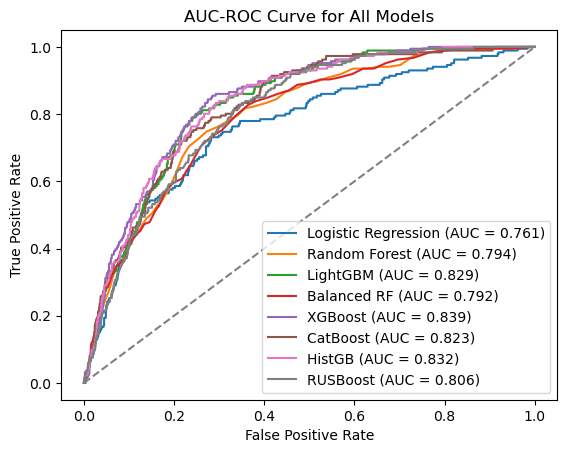

In [33]:
classification_features = (all_features.drop(columns = ['prism_consumer_id', 'evaluation_date', 'DQ_TARGET'])).columns
classify.run_classification(classification_features, "DQ_TARGET", all_features)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = classify.preprocess_features(
    classification_features, "DQ_TARGET", all_features
)

# Run optimization
best_params, best_val_score, best_model = classify.optimize_xgb_params(
    X_train, X_test, y_train, y_test, max_evals=20
)


Starting hyperparameter optimization...
 40%|████      | 8/20 [01:41<02:04, 10.37s/trial, best loss: -0.8227319661041089]

In [44]:
from sklearn.metrics import roc_auc_score

y_proba = best_model.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_proba)


0.9996975756920627

In [28]:
best_features = classify.get_best_features(classification_features, 'DQ_TARGET', all_features)

In [31]:
all_features[best_features[0]]

,credit_score,account_type_SAVINGS,balance,OVERDRAFT_median,ACCOUNT_FEES_median,OVERDRAFT_std,ACCOUNT_FEES_std,BNPL_median,ACCOUNT_FEES_count,OVERDRAFT_count,SELF_TRANSFER_iqr,ESSENTIAL_SERVICES_count,LOAN_count,LOAN_median,ATM_CASH_count,BNPL_std,ATM_CASH_coef_variation,SELF_TRANSFER_count,GENERAL_MERCHANDISE_count,LOAN_iqr,BNPL_count,MISCELLANEOUS_count,AUTOMOTIVE_median,LOAN_std,DEPOSIT_median,BNPL_coef_variation,SELF_TRANSFER_std,ACCOUNT_FEES_mean,ENTERTAINMENT_count,MISCELLANEOUS_median,ESSENTIAL_SERVICES_median,BNPL_skewness,INVESTMENT_INCOME_count,BNPL_iqr,MISCELLANEOUS_skewness,INSURANCE_count,account_type_CHECKING,ATM_CASH_iqr,INVESTMENT_INCOME_median,REFUND_count,DEPOSIT_count,ACCOUNT_FEES_iqr,FOOD_AND_BEVERAGES_count,PAYCHECK_median,CREDIT_CARD_PAYMENT_count,MISCELLANEOUS_std,ENTERTAINMENT_skewness,LOAN_coef_variation,GROCERIES_median,ATM_CASH_median
0,726.0,1,320.37,0.0,0.00,0.000000,0.000000,0.000,0.0,0.0,58.075,0.0,0.0,0.00,3.0,0.000000,1.543605,23.0,26.0,0.0000,0.0,42.0,20.190,0.000000,-500.000,0.000000,910.846217,0.000000,6.0,17.555,0.000,0.000000,0.0,0.000,2.788004,0.0,1,250.00,0.00,1.0,1.0,0.00,214.0,-1075.310,0.0,418.578546,1.625361,0.000000,31.670,40.00
1,626.0,1,3302.42,0.0,0.00,0.000000,0.000000,16.875,0.0,0.0,375.000,0.0,0.0,0.00,35.0,53.420627,0.852951,78.0,54.0,0.0000,14.0,27.0,28.740,0.000000,-746.475,0.371161,0.000000,0.000000,22.0,10.920,0.000,0.933361,0.0,5.675,5.133164,0.0,1,320.00,0.00,1.0,2.0,0.00,18.0,-900.070,0.0,869.042838,2.774336,0.000000,9.485,100.00
2,680.0,1,2805.36,0.0,0.00,0.000000,0.000000,0.000,0.0,0.0,255.000,3.0,0.0,0.00,9.0,0.000000,1.663976,85.0,39.0,0.0000,0.0,103.0,25.415,0.000000,-550.000,0.000000,1419.972961,0.000000,6.0,7.250,70.000,0.000000,0.0,0.000,4.853915,8.0,1,920.00,0.00,2.0,2.0,0.00,71.0,0.000,0.0,278.500198,0.831478,0.000000,13.300,80.00
3,734.0,1,7667.01,0.0,0.00,0.000000,0.000000,0.000,0.0,0.0,600.000,6.0,0.0,0.00,2.0,0.000000,0.467750,46.0,60.0,0.0000,0.0,23.0,53.850,0.000000,-515.000,0.000000,0.000000,0.000000,12.0,-0.120,55.975,0.000000,0.0,0.000,2.985056,0.0,1,18.77,0.00,2.0,2.0,0.00,17.0,-1349.610,0.0,95.325878,1.017417,0.000000,25.335,56.75
4,676.0,1,394.55,0.0,0.00,0.000000,0.000000,0.000,0.0,0.0,450.000,5.0,0.0,0.00,10.0,0.000000,0.557420,16.0,8.0,0.0000,0.0,76.0,16.260,0.000000,-15.220,0.000000,10.878242,0.000000,14.0,22.220,164.280,0.000000,0.0,0.000,3.306631,5.0,1,175.00,0.00,5.0,3.0,0.00,15.0,0.000,2.0,356.821630,1.801997,0.000000,34.520,420.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13004,667.0,1,1092.69,36.0,0.25,18.000000,0.367865,59.270,5.0,1.0,25.210,12.0,3.0,118.42,3.0,29.635000,0.780625,13.0,306.0,95.0000,2.0,32.0,8.340,97.180369,-44.000,0.000000,87.299810,0.000000,62.0,16.860,94.405,0.000000,0.0,0.000,0.088563,15.0,1,40.00,0.00,21.0,10.0,0.12,45.0,-30.000,7.0,78.015133,1.731021,0.774192,15.860,40.00
13005,709.0,0,29164.00,35.0,8.75,110.679718,21.901998,87.780,4.0,10.0,8.015,20.0,127.0,100.00,5.0,464.789754,1.242408,106.0,219.0,131.0250,24.0,116.0,22.010,6102.028634,-389.500,1.001751,351.760641,-0.033333,8.0,31.810,95.000,3.819557,0.0,79.010,6.785660,38.0,1,1380.00,0.00,16.0,14.0,16.80,148.0,-2585.155,29.0,3259.078160,2.798785,-197.018447,33.060,150.00
13006,616.0,1,5464.18,0.0,6.95,0.000000,20.536107,17.415,29.0,0.0,225.000,0.0,17.0,586.13,9.0,17.434358,0.831317,165.0,99.0,675.3700,8.0,88.0,30.000,693.006414,-395.000,0.027088,2488.764056,-3.161111,39.0,35.145,0.000,-0.000546,0.0,0.880,-1.721279,0.0,3,150.00,0.00,18.0,26.0,4.45,149.0,-62.500,93.0,2340.094214,1.541189,0.565571,45.005,82.95
13007,625.0,1,6821.92,0.0,6.00,0.000000,8.671253,0.000,17.0,0.0,1537.190,1.0,0.0,0.00,5.0,0.000000,0.159719,45.0,24.0,0.0000,0.0,35.0,36.740,0.000000,-275.000,0.000000,4314.959765,0.183333,13.0,31.300,54.990,0.000000,8.0,0.000,3.535039,0.0,1,0.00,-0.03,3.0,28.0,7.00,29.0,-644.460,0.0,836.682822,0.378